### Multiclass Support Vector Machines
In this exercise you will:
- implement a fully-vectorized loss function for the mulri-class SVM
- implement the fully-vectorized expression for its analytic gradient
- check your implementation using numerical gradient
- use a validation set to tune the learning rate and regularization strength
- optimize the loss function with SGD
- visualize the final learned parameters

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### CIFAR-10 Data Loading and Preprocessing
Open up a terminal window and navigate to the datasets folder inside the hw3 folder. Run the get_datasets.sh script. On my Mac, I just type in ./get_datasets.sh at the shell prompt. A new folder called cifar_10_batches_py will be created and it will contain 50000 labeled images for training and  10000 labeled images for testing. The function further partitions the  50000 training images into a train set and a validation set for selection of hyperparameters. We have provided a function to read this data in **data_utils.py**. Each image is a  32×32
array of RGB triples. It is preprocessed by subtracting the mean image from all images. We flatten each image into a 1-dimensional array of size 3072 (i.e.,  32×32×3). Then a 1 is appended to the front of that vector to handle the intercept term. So the training set is a numpy matrix of size  49000×3073, the validation set is a matrix of size  1000×3073 and the set-aside test set is of size  10000×3073. We also have a random sample of 500 images from the training data to serve as a development set or dev set to test our gradient and loss function implementations.

In [3]:
import data_utils

# Get the CIFAR-10 data broken up into train, validation and test sets

X_train, y_train, X_val, y_val, X_dev, y_dev, X_test, y_test = data_utils.get_CIFAR10_data()

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (10000, 3072)
dev data shape:  (500, 3072)
Training data shape with bias term:  (49000, 3073)
Validation data shape with bias term:  (1000, 3073)
Test data shape with bias term:  (10000, 3073)
Devset data shape with bias term:  (500, 3073)


### SVM Classifier
Your code for this section will all be written inside **linear_svm.py**.
You will need to write the function **naive_loss_svm** which uses for loops to evaluate the multiclass SVM loss function.

In [19]:
# Evaluate the naive implementation of the loss we provided for you:
from linear_svm import svm_loss_naive
import time

# generate a random SVM coefficient matrix of small numbers
theta = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(theta, X_train, y_train, 0.00001)
print 'loss: %f' % (loss, )
print 'grad: ', grad

loss: 9.095561
grad:  [[-1.55198004e+01 -2.21492096e+00  1.02846154e+01 ... -4.64767762e+00
  -1.96342598e+01 -3.56834053e+01]
 [-2.64891016e+01  1.59764533e+00  1.02325691e+01 ... -5.98037611e+00
  -3.04047081e+01 -4.04887135e+01]
 [-4.71868199e+01  5.73219067e-01  2.27251410e+01 ... -5.98301545e+00
  -4.94731253e+01 -5.14551783e+01]
 ...
 [-1.16591421e+01 -3.61190577e+00  4.27050162e+00 ... -9.80914548e+00
   1.22828353e+01 -9.26249986e+00]
 [-2.50414869e+01 -1.00037267e+01  1.24862525e+01 ...  4.44199259e+00
  -7.02043538e+00 -1.33474552e+01]
 [-1.22653060e-02  1.85714312e-02 -1.24489974e-03 ...  1.75510345e-03
  -6.36734707e-03  4.51020531e-03]]


The grad returned from the function above is right now all zero. Derive and implement the gradient for the SVM cost function and implement it inline inside the function **svm_loss_naive**. You will find it helpful to interleave your new code inside the existing function.
To check that you have correctly implemented the gradient, you can numerically estimate the gradient of the loss function and compare the numeric estimate to the gradient that you computed. We have provided code that does this for you.

In [20]:
# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at theta.
loss, grad = svm_loss_naive(theta, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from gradient_check import grad_check_sparse
f = lambda th: svm_loss_naive(th, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, theta, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = svm_loss_naive(theta, X_dev, y_dev, 1e2)
f = lambda w: svm_loss_naive(theta, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, theta, grad)

numerical: -5.880009 analytic: -5.880009, relative error: 3.536546e-11
numerical: -32.517641 analytic: -32.517641, relative error: 9.072860e-12
numerical: 8.248425 analytic: 8.248425, relative error: 2.672592e-11
numerical: 6.707559 analytic: 6.772569, relative error: 4.822664e-03
numerical: 3.280751 analytic: 3.280751, relative error: 3.816716e-11
numerical: -11.090639 analytic: -11.090639, relative error: 3.410561e-11
numerical: -25.555127 analytic: -25.555127, relative error: 6.389501e-12
numerical: -15.409469 analytic: -15.409469, relative error: 1.245965e-11
numerical: 15.848133 analytic: 15.848133, relative error: 1.689554e-11
numerical: -3.844652 analytic: -3.856201, relative error: 1.499711e-03
numerical: -22.394613 analytic: -22.356658, relative error: 8.481348e-04
numerical: -0.337740 analytic: -0.337740, relative error: 7.667507e-10
numerical: 13.390738 analytic: 13.390738, relative error: 2.341020e-11
numerical: 20.779074 analytic: 20.779074, relative error: 1.925903e-11
nu

In [22]:
# Next implement the function svm_loss_vectorized; for now only compute the loss;
# we will implement the gradient in a moment.
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(theta, X_dev, y_dev, 0.00001)
toc = time.time()
print 'Naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(theta, X_dev, y_dev, 0.00001)
toc = time.time()
print 'Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# The losses should match but your vectorized implementation should be much faster.
print 'difference: %f' % (loss_naive - loss_vectorized)

Naive loss: 9.065309e+00 computed in 0.094509s
Vectorized loss: 9.065309e+00 computed in 0.008333s
difference: -0.000000


### Vectorized version of the gradient computation
Complete the implementation of svm_loss_vectorized, and compute the gradient
of the loss function in a vectorized way.



In [23]:
# The naive implementation and the vectorized implementation should match, but
# the vectorized version should still be much faster.
tic = time.time()
_, grad_naive = svm_loss_naive(theta, X_dev, y_dev, 0.00001)
toc = time.time()
print 'Naive loss and gradient: computed in %fs' % (toc - tic)

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(theta, X_dev, y_dev, 0.00001)
toc = time.time()
print 'Vectorized loss and gradient: computed in %fs' % (toc - tic)

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'difference: %f' % difference

Naive loss and gradient: computed in 0.103103s
Vectorized loss and gradient: computed in 0.008362s
difference: 0.000000


In [29]:
# In the file linear_classifier.py, we have implemented SGD in the function
# LinearClassifier.train() and you can run it with the code below.
from linear_classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print 'That took %fs' % (toc - tic)

iteration 0 / 1500: loss 799.151286
iteration 100 / 1500: loss 292.977841
iteration 200 / 1500: loss 109.770825
iteration 300 / 1500: loss 43.644568
iteration 400 / 1500: loss 19.389028
iteration 500 / 1500: loss 10.487724
iteration 600 / 1500: loss 7.400595
iteration 700 / 1500: loss 6.139976
iteration 800 / 1500: loss 5.530756
iteration 900 / 1500: loss 5.234495
iteration 1000 / 1500: loss 5.784717
iteration 1100 / 1500: loss 5.330147
iteration 1200 / 1500: loss 5.192459
iteration 1300 / 1500: loss 5.381114
iteration 1400 / 1500: loss 4.984988
That took 5.426974s


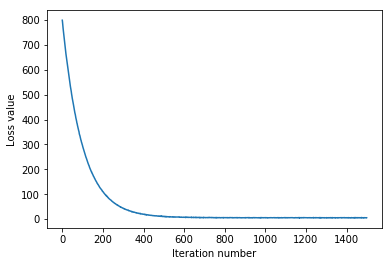

In [30]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Prediction with an SVM
Compute $\theta^T  x$ for a new example $x$ and pick the class with the highest score.

In [31]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print 'training accuracy: %f' % (np.mean(y_train == y_train_pred), )
y_val_pred = svm.predict(X_val)
print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

training accuracy: 0.367204
validation accuracy: 0.376000


In [15]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.38 or higher on the validation set.

learning_rates = [1e-8, 5e-8, 1e-7, 5e-7, 1e-6]
regularization_strengths = [1e4, 5e4, 1e5, 5e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################

for learning_rate in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, learning_rate=learning_rate, reg=reg,
                      num_iters=1500, verbose=False)
        
        y_train_pred = svm.predict(X_train)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        val_accuracy = np.mean(y_val == y_val_pred)
        
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
        
        results[(learning_rate, reg)] = (train_accuracy, val_accuracy)
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.000000e-08 reg 1.000000e+04 train accuracy: 0.221286 val accuracy: 0.232000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.251714 val accuracy: 0.262000
lr 1.000000e-08 reg 1.000000e+05 train accuracy: 0.291959 val accuracy: 0.308000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.325510 val accuracy: 0.344000
lr 5.000000e-08 reg 1.000000e+04 train accuracy: 0.315939 val accuracy: 0.331000
lr 5.000000e-08 reg 5.000000e+04 train accuracy: 0.371776 val accuracy: 0.382000
lr 5.000000e-08 reg 1.000000e+05 train accuracy: 0.361184 val accuracy: 0.369000
lr 5.000000e-08 reg 5.000000e+05 train accuracy: 0.314061 val accuracy: 0.320000
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.373633 val accuracy: 0.363000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.364796 val accuracy: 0.370000
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.360837 val accuracy: 0.374000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.310612 val accuracy: 0.339000
lr 5.000000e-07 reg 1.000000

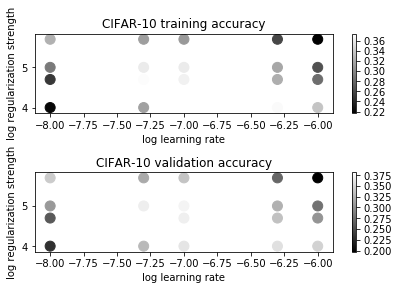

In [16]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.tight_layout()
plt.show()

In [17]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'linear SVM on raw pixels final test set accuracy: %f' % test_accuracy

# compute confusion matrix
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test,y_test_pred)

linear SVM on raw pixels final test set accuracy: 0.368700
[[416  30  36  16  16  24  40  26 300  96]
 [ 57 342  15  38  35  35  95  27 135 221]
 [119  38 167  59 142  74 245  38  81  37]
 [ 64  51  67 182  55 166 241  42  63  69]
 [ 56  16  84  47 286  77 283  60  47  44]
 [ 58  26  82 117  70 298 189  47  85  28]
 [ 31  32  42  62  81  60 601  18  23  50]
 [ 55  37  49  51 145  75 117 288  57 126]
 [107  51  10  16   9  47  17  13 565 165]
 [ 58 106  11  23  13  12  78  32 125 542]]


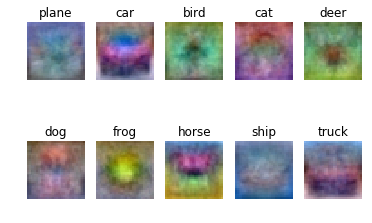

In [14]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.

theta = best_svm.theta[:-1,:] # strip out the bias
theta = theta.reshape(32, 32, 3, 10)
theta_min, theta_max = np.min(theta), np.max(theta)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  thetaimg = 255.0 * (theta[:, :, :, i].squeeze() - theta_min) / (theta_max - theta_min)
  plt.imshow(thetaimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
plt.savefig('multiclass_svm_theta.png')